In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("../data/BPD_CRIME_DATA_WITHDEMOGRAPHICS.csv")


In [4]:
df.head(20)

,Unnamed: 0,Unnamed: 0.1,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,...,households_below_poverty,perc18_24,perc25_64,perc65up,perc_asian,perc_aa,perc_hisp,pwhi,num_households,median_price_homes_sold
0,0,0,ROBBERY - RESIDENCE,Inside,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,...,24.213606,8.248062,57.449612,7.302326,2.527132,37.961240,14.906977,39.682171,NaN,52000.0
1,1,1,AUTO THEFT,Outside,NONE,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,...,25.964546,8.231621,56.940108,11.003879,0.624468,83.990917,2.876336,10.966033,NaN,127500.0
2,2,2,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,AGG. ASSAULT,Inside,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,COMMON ASSAULT,Outside,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,5,BURGLARY,Inside,NONE,922.0,SOUTHERN,Cherry Hill,-76.62131,39.24867,...,39.337017,9.134854,45.575112,9.779375,0.929598,87.469013,5.813089,4.362915,NaN,45000.0
6,6,6,HOMICIDE,Outside,FIREARM,232.0,SOUTHEASTERN,Canton,-76.56827,39.28202,...,3.661784,5.849147,75.246217,10.533269,4.383858,3.939467,3.086716,85.575306,NaN,306500.0
7,7,7,ROBBERY - STREET,Outside,NONE,123.0,CENTRAL,Upton,-76.62789,39.30254,...,42.982456,11.429971,47.277179,10.803134,1.860921,91.635651,0.636631,4.221352,NaN,100000.0
8,8,8,AGG. ASSAULT,Outside,OTHER,641.0,NORTHWESTERN,Windsor Hills,-76.68365,39.31370,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,9,COMMON ASSAULT,Inside,HANDS,332.0,EASTERN,Berea,-76.57419,39.30551,...,27.649528,8.788912,52.139479,15.157848,0.417996,93.664063,2.034980,2.364976,NaN,42786.0


In [7]:
df = df.drop(columns=["Unnamed: 0","Unnamed: 0.1"])

In [8]:
df.head()


,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise,Season,...,households_below_poverty,perc18_24,perc25_64,perc65up,perc_asian,perc_aa,perc_hisp,pwhi,num_households,median_price_homes_sold
0,ROBBERY - RESIDENCE,Inside,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,ROW/TOWNHO,summer,...,24.213606,8.248062,57.449612,7.302326,2.527132,37.961240,14.906977,39.682171,NaN,52000.0
1,AUTO THEFT,Outside,NONE,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,STREET,summer,...,25.964546,8.231621,56.940108,11.003879,0.624468,83.990917,2.876336,10.966033,NaN,127500.0
2,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,STREET,summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGG. ASSAULT,Inside,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,ROW/TOWNHO,summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COMMON ASSAULT,Outside,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,STREET,summer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's take a look at the null values

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263121 entries, 0 to 263120
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Description               263121 non-null  object 
 1   Inside/Outside            263121 non-null  object 
 2   Weapon                    263121 non-null  object 
 3   Post                      263121 non-null  float64
 4   District                  263121 non-null  object 
 5   Neighborhood              263121 non-null  object 
 6   Longitude                 263121 non-null  float64
 7   Latitude                  263121 non-null  float64
 8   Premise                   263121 non-null  object 
 9   Season                    263121 non-null  object 
 10  Month                     263121 non-null  int64  
 11  Hour                      263121 non-null  int64  
 12  Year                      263121 non-null  int64  
 13  CSA                       111993 non-null  o

Looks like they're all part of the new data. However, this new data does actually look like it can be imputed! Let's clean first a bit.

In [12]:
df.CSA.value_counts()

Downtown/Seton Hill                      9603
Cedonia/Frankford                        6850
Sandtown-Winchester/Harlem Park          6305
Brooklyn/Curtis Bay/Hawkins Point        6291
Belair-Edison                            5722
Inner Harbor/Federal Hill                4695
Medfield/Hampden/Woodberry/Remington     4430
Upton/Druid Heights                      4353
Penn North/Reservoir Hill                3952
Cherry Hill                              3932
Canton                                   3653
Greater Charles Village/Barclay          3640
Howard Park/West Arlington               3479
Fells Point                              3218
Washington Village/Pigtown               3119
Greater Mondawmin                        3104
Morrell Park/Violetville                 2869
Westport/Mount Winans/Lakeland           2847
Poppleton/The Terraces/Hollins Market    2786
Allendale/Irvington/S. Hilton            2733
Glen-Fallstaff                           2441
Oldtown/Middle East               

This looks like the column used to match with neighborhoods.


In [14]:
df[["CSA", "Neighborhood"]].head(20)

,CSA,Neighborhood
0,Brooklyn/Curtis Bay/Hawkins Point,Brooklyn
1,Penn North/Reservoir Hill,Reservoir Hill
2,NaN,Winston-Govans
3,NaN,Carrollton Ridge
4,NaN,Downtown West
5,Cherry Hill,Cherry Hill
6,Canton,Canton
7,Upton/Druid Heights,Upton
8,NaN,Windsor Hills
9,Clifton-Berea,Berea


Yep. Can drop this.

In [15]:
df = df.drop(columns=["CSA"])


The num_households variable looks like it is all null. Drop.


In [16]:
df.num_households.value_counts()


Series([], Name: num_households, dtype: int64)

In [17]:
df = df.drop(columns=["num_households"])


In [18]:
df.describe()

,Post,Longitude,Latitude,Month,Hour,Year,median_household_income,households_below_poverty,perc18_24,perc25_64,perc65up,perc_asian,perc_aa,perc_hisp,pwhi,median_price_homes_sold
count,263121.000000,263121.00000,263121.000000,263121.000000,263121.000000,263121.000000,111993.000000,51833.000000,51833.000000,51833.000000,51833.000000,51833.000000,51833.000000,51833.000000,51833.000000,111993.000000
mean,505.839732,-76.61747,39.307456,6.515622,13.293242,2014.307494,44762.632048,19.882242,10.859386,57.518633,11.076125,3.570093,58.842530,4.356489,30.502446,123883.995598
std,260.790134,0.04222,0.029536,3.295076,6.768847,1.626543,20912.174139,12.669277,5.238397,8.493396,4.591031,4.190585,33.004647,4.240844,27.629849,91443.474131
min,111.000000,-76.71128,39.200410,1.000000,0.000000,2012.000000,13478.164522,0.811908,2.901160,43.598031,4.414003,0.000000,1.726247,0.017008,0.358262,12550.000000
25%,242.000000,-76.64842,39.288340,4.000000,9.000000,2013.000000,33526.364650,7.528577,8.233108,51.519081,7.864742,0.547692,29.776084,1.406284,4.362915,47050.000000
50%,511.000000,-76.61401,39.303680,7.000000,15.000000,2014.000000,39495.628472,18.816794,9.371567,55.578669,10.396187,1.945525,69.781797,3.381459,20.776607,88500.000000
75%,731.000000,-76.58749,39.327890,9.000000,19.000000,2016.000000,48731.137681,26.333747,11.228641,63.126900,13.708109,4.742416,88.789903,5.362851,46.676814,190000.000000
max,943.000000,-76.52977,39.371980,12.000000,23.000000,2017.000000,113496.137874,48.720930,30.297173,77.957456,26.968635,16.255931,97.440983,35.227378,90.032994,377500.000000


I'm not too happy about this many missing values. However, the nature of these could actually lend itself to imputation. Let's give it a try.
Sklearn's iterative imputer says it is experimental. Let's try out miceforest. It uses the MICE algorithm with random forest, as the name implies.

In [19]:
import miceforest as mf

We need to convert the categorical variables to their labels from before. This is the unencoded data.

In [23]:
bpd_df = pd.get_dummies(df, columns=["Inside/Outside"],drop_first=True)
bpd_df= bpd_df.rename(columns={"Inside/Outside_Outside":"Outside"})

In [24]:
bpd_df = pd.get_dummies(bpd_df, columns=["Weapon","Season"])

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
Description = pd.read_csv("../data/Description_decoder_2.csv", header=None)
Premise = pd.read_csv("../data/Premise_decoder.csv", header=None)
Neigh = pd.read_csv("../data/Neighborhood_decoder.csv", header=None)
District = pd.read_csv("../data/District_decoder.csv", header=None)


Should we drop year?


In [28]:
are_there_years = df[df.median_household_income.notnull()]
are_there_years.Year.value_counts()

2012    20739
2016    20394
2013    20340
2015    20030
2014    19081
2017    11409
Name: Year, dtype: int64

Hmm no, there are multiple years, and will be useful to impute!


In [29]:
le.fit(Description[0])
le.classes_


array(['AGG. ASSAULT', 'ARSON', 'ASSAULT BY THREAT', 'AUTO THEFT',
       'BURGLARY', 'COMMON ASSAULT', 'HOMICIDE', 'LARCENY',
       'LARCENY FROM AUTO', 'ROBBERY - CARJACKING',
       'ROBBERY - COMMERCIAL', 'ROBBERY - RESIDENCE', 'ROBBERY - STREET',
       'SEXUAL ASSULT', 'SHOOTING'], dtype=object)

In [36]:
le.classes_[13] = "RAPE"
le.classes_

array(['AGG. ASSAULT', 'ARSON', 'ASSAULT BY THREAT', 'AUTO THEFT',
       'BURGLARY', 'COMMON ASSAULT', 'HOMICIDE', 'LARCENY',
       'LARCENY FROM AUTO', 'ROBBERY - CARJACKING',
       'ROBBERY - COMMERCIAL', 'ROBBERY - RESIDENCE', 'ROBBERY - STREET',
       'RAPE', 'SHOOTING'], dtype=object)

In [37]:
bpd_df["Description"]=le.transform(bpd_df["Description"])


In [38]:
le.fit(Neigh[0])
bpd_df["Neighborhood"]=le.transform(bpd_df["Neighborhood"])


In [39]:
le.fit(Premise[0])
bpd_df["Premise"]=le.transform(bpd_df["Premise"])


In [40]:
le.fit(District[0])
bpd_df["District"]=le.transform(bpd_df["District"])


In [41]:
bpd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263121 entries, 0 to 263120
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Description               263121 non-null  int32  
 1   Post                      263121 non-null  float64
 2   District                  263121 non-null  int32  
 3   Neighborhood              263121 non-null  int32  
 4   Longitude                 263121 non-null  float64
 5   Latitude                  263121 non-null  float64
 6   Premise                   263121 non-null  int32  
 7   Month                     263121 non-null  int64  
 8   Hour                      263121 non-null  int64  
 9   Year                      263121 non-null  int64  
 10  median_household_income   111993 non-null  float64
 11  households_below_poverty  51833 non-null   float64
 12  perc18_24                 51833 non-null   float64
 13  perc25_64                 51833 non-null   f

Looks good. Let's do it.

In [42]:
kernel = mf.MultipleImputedKernel(data=bpd_df, save_all_iterations=True,random_state=42069)


This should save the iterations of the MICE algorithm. We can then compare the imputed values to see if they are similar, giving us some confidence.


In [44]:
import timeit

In [45]:
start = timeit.default_timer()
kernel.mice(3,verbose=True,n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)

Dataset 0
1  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | pwhi | median_price_homes_sold
2  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | pwhi | median_price_homes_sold
3  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | pwhi | median_price_homes_sold
Dataset 1
1  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | pwhi | median_price_homes_sold
2  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | pwhi | median_price_homes_sold
3  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | pwhi | median_price_homes_sold
Dataset 2
1  | median_hous

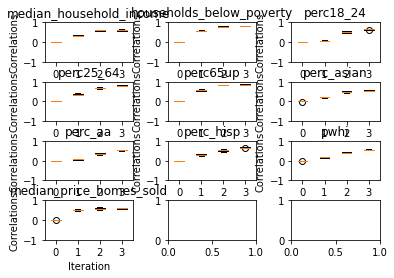

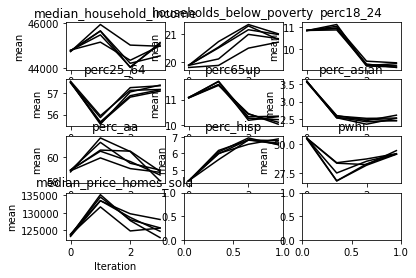

In [55]:
kernel.plot_correlations(wspace=0.4,hspace=0.5)
kernel.plot_mean_convergence()


Looks like we're actually getting decent results from the imputation! The graphs are hard to see and I can't make them bigger, but the correlations between the 5 imputed datasets are fairly high, and are converging. Let's do it one more time with 5 iterations instead.


In [56]:
start = timeit.default_timer()
kernel.mice(5,verbose=True,n_jobs=-1)
stop = timeit.default_timer()
print('Time: ', stop - start)


Dataset 0
4  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | pwhi | median_price_homes_sold
5  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | pwhi | median_price_homes_sold
6  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | pwhi | median_price_homes_sold
7  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | pwhi | median_price_homes_sold
8  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | pwhi | median_price_homes_sold
Dataset 1
4  | median_household_income | households_below_poverty | perc18_24 | perc25_64 | perc65up | perc_asian | perc_aa | perc_hisp | pwhi | median_price_homes_sold
5  | median_household_inco

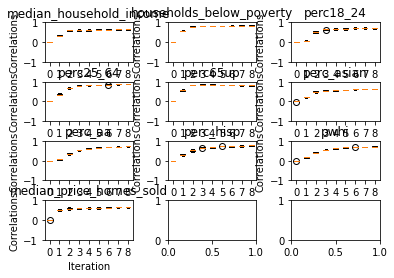

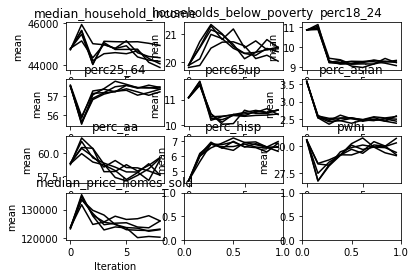

In [57]:
kernel.plot_correlations(wspace=0.4,hspace=0.5)
kernel.plot_mean_convergence()


Very nice



In [66]:
completed_data = kernel.complete_data(0)

In [68]:
completed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263121 entries, 0 to 263120
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Description               263121 non-null  int32  
 1   Post                      263121 non-null  float64
 2   District                  263121 non-null  int32  
 3   Neighborhood              263121 non-null  int32  
 4   Longitude                 263121 non-null  float64
 5   Latitude                  263121 non-null  float64
 6   Premise                   263121 non-null  int32  
 7   Month                     263121 non-null  int64  
 8   Hour                      263121 non-null  int64  
 9   Year                      263121 non-null  int64  
 10  median_household_income   263121 non-null  float64
 11  households_below_poverty  263121 non-null  float64
 12  perc18_24                 263121 non-null  float64
 13  perc25_64                 263121 non-null  f

In [69]:
bpd_df.to_csv("../data/BPD_CRIME_DATA_W_IMPUTED_DEMO.csv")